#**Proyecto Final de Minería de Datos   --- Pablo Galaz Molina S7C---**

#**Predicción de la Diabetes **🧑

In [6]:
#Primero que nada vamos a importar las librerias a utilizar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [7]:
#Ahora vamos a cargar el dataset
data = pd.read_csv('diabetes.csv')

#Analisis Exploratorio de los Datos

In [8]:
#Vamos a mostrar la longitud del dataset
filas, columnas = data.shape
print('Numero de filas: ', filas)
print('Numero de columnas: ', columnas)

Numero de filas:  768
Numero de columnas:  9


In [9]:
#Vamos a desplegar la información del dataset para un mejor entendimiento de su estructura
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
#Para un mejor entendimiento de su estructura, ahora mostraremos estadisticas del dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
#Antes de pasar a trabajar con el modelo, vamos a proceder a ver si hay valores nulos
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
#E igualmente vamos a comprobar si hay valores duplicados en el dataset
data.duplicated().sum()

0

No hay valores duplicados, lo cual es una buena señal

#Distribución de los Datos




Haciendo uso de las librerias plt y sns graficamos la distribucion de cada una de las columnas.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


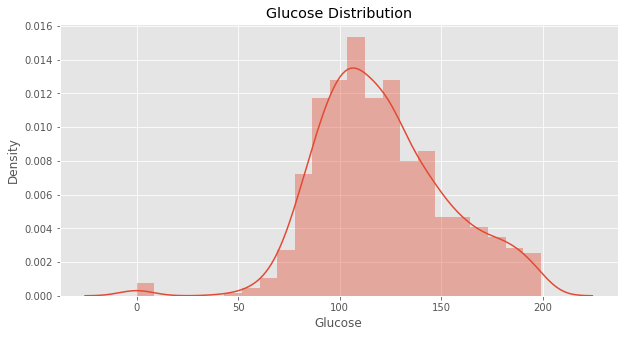

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Glucose Distribution')
sns.distplot(data['Glucose'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


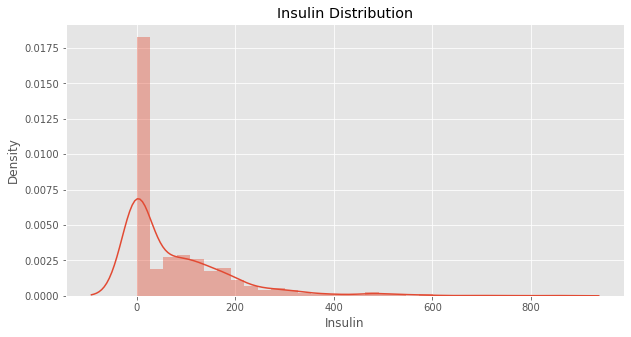

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Insulin Distribution')
sns.distplot(data['Insulin'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


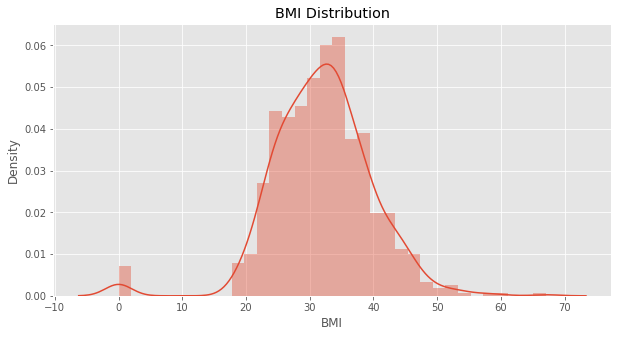

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('BMI Distribution')
sns.distplot(data['BMI'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


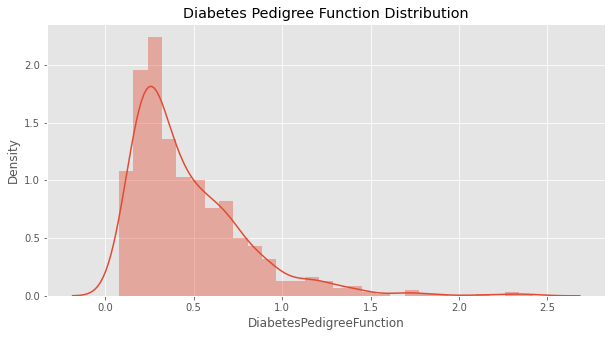

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Diabetes Pedigree Function Distribution')
sns.distplot(data['DiabetesPedigreeFunction'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


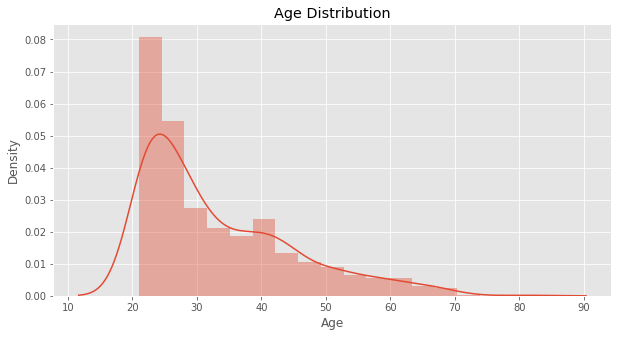

In [17]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('Age Distribution')
sns.distplot(data['Age'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


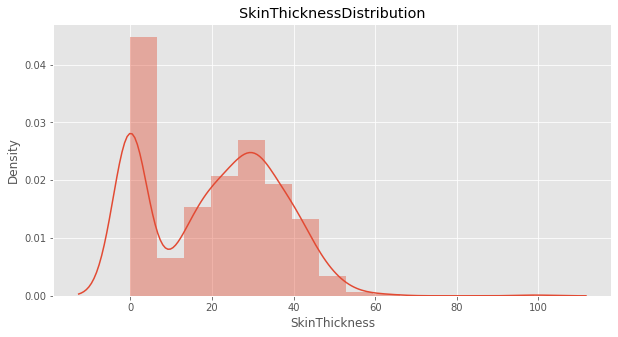

In [18]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.title('SkinThicknessDistribution')
sns.distplot(data['SkinThickness'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


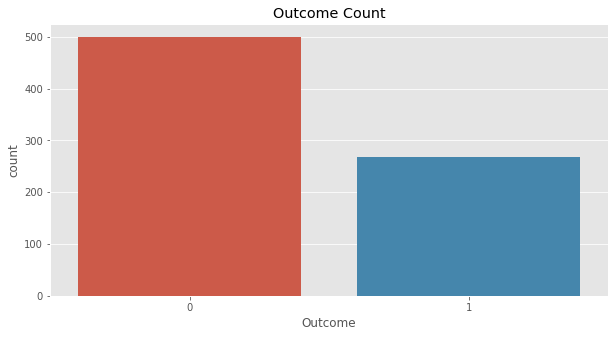

In [19]:
plt.figure(figsize=(10, 5))
sns.countplot(data['Outcome'])
plt.title('Outcome Count')
plt.show()

#Preprocesamiento de los Datos


In [20]:
#Se establece la columna Outcome como target y saltamos la primera columna
target = data['Outcome']
data.drop(columns='Outcome', axis=1, inplace=True)

In [21]:
#Se hace el escalado estandar en el dataframe
scale = StandardScaler()
newData = pd.DataFrame(scale.fit_transform(data), columns=data.columns)

In [22]:
#Se imprime el cabecero del nuevo dataframe
newData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [23]:
#Se carga la cabecera del target (Outcome)
target.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

#Prueba de Entrenamiento

In [24]:
#Se le hace la prueba de entrenamiento al modelo
xtrain, xtest, ytrain, ytest = train_test_split(newData, target, test_size=0.2, random_state=42)

#Entrenado el Modelo

In [25]:
#Support Vector Classifier
svc = SVC()

param = {
    'C': [i for i in range(1, 10)],
    'kernel': ['rbf', 'linear', 'poly']}

grid = GridSearchCV(svc, param, cv=5, scoring='neg_mean_squared_error')
grid.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'kernel': ['rbf', 'linear', 'poly']},
             scoring='neg_mean_squared_error')

In [26]:
#Se ajustan los parametros de regresion lineal a los datos
SvcModel = grid.best_estimator_
SvcModel.fit(xtrain, ytrain)

SVC(C=2)

In [27]:
#Evaluando la variable a los resultados
svc_cv = cross_val_score(SvcModel, newData, target, cv=5)

In [28]:
#Se imprimen los resultados obtenidos
print('Scores: ', svc_cv)
print('Mean: ', np.mean(svc_cv))

Scores:  [0.75974026 0.76623377 0.75324675 0.80392157 0.78431373]
Mean:  0.7734912146676851


#Evaluando el Modelo

In [29]:
#Función Main con parametros para imprimir los resultados
def Main(modelName, model, cv):
  print(f'============ {modelName} ============')
  print('Model training error ---> ', np.mean(cv))
  print('َAccuracy ---> ', accuracy_score(ytest, model.predict(xtest)))
  print('ConfusionMatix:')
  print(confusion_matrix(ytest, model.predict(xtest))) 
  print()
  print(classification_report(ytest, model.predict(xtest)))
  print()

In [30]:
#Se imprimen los resultados del modelo
Main('SupportVectorMachine', SvcModel, svc_cv)

============ SupportVectorMachine ============
Model training error --->  0.7734912146676851
َAccuracy --->  0.7207792207792207
ConfusionMatix:
[[81 18]
 [25 30]]

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        99
           1       0.62      0.55      0.58        55

    accuracy                           0.72       154
   macro avg       0.69      0.68      0.69       154
weighted avg       0.71      0.72      0.72       154




#Matriz de Confusión

In [33]:
model = LogisticRegression()
model.fit(xtest,ytest)
y_pred = model.predict(xtest)

In [36]:
cm = confusion_matrix(ytest, y_pred)

df_cm = pd.DataFrame(cm)
df_cm.rename(columns={0:'No Diabetes', 1:'Diabetes'}, index={0:'No Diabetes', 1:'Diabetes'}, inplace=True)
df_cm

,No Diabetes,Diabetes
No Diabetes,87,12
Diabetes,19,36
